In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('BigTests.pickle', 'rb')
data = pickle.load(f)

In [2]:
print(data['var'])
print(data['order'])

{'totalNodes': [500, 1000, 2000, 3500], 'clusterMinThresh': [0, 2], 'globalRecluster': ['false', 'true'], 'localRecluster': [0, 1, 2, 3], 'reclusterPeriod': [5, 30, 90], 'reclusterThreshold': [0.025, 0.05, 0.1, 0.15, 0.2, 0.4], 'bluetoothLossPercentage': [0, 1e-06, 2e-06, 5e-06], 'wifiLossPercentage': [2e-05, 5e-05]}
['totalNodes', 'clusterMinThresh', 'globalRecluster', 'localRecluster', 'reclusterPeriod', 'reclusterThreshold', 'bluetoothLossPercentage', 'wifiLossPercentage']


In [3]:
data['data'].keys()

dict_keys([(1000, 0, 'true', 1, 30, 0.2, 0, 5e-05), (1000, 2, 'true', 3, 90, 0.1, 2e-06, 2e-05), (1000, 0, 'true', 0, 30, 0.15, 1e-06, 2e-05), (500, 2, 'true', 2, 30, 0.15, 0, 2e-05), (2000, 0, 'true', 2, 5, 0.15, 5e-06, 5e-05), (500, 2, 'true', 2, 30, 0.025, 1e-06, 2e-05), (500, 0, 'true', 0, 30, 0.05, 5e-06, 2e-05), (500, 0, 'true', 0, 5, 0.2, 2e-06, 2e-05), (3500, 2, 'true', 0, 5, 0.4, 5e-06, 5e-05), (2000, 0, 'true', 0, 30, 0.05, 1e-06, 2e-05), (1000, 0, 'true', 3, 5, 0.1, 2e-06, 5e-05), (500, 0, 'true', 3, 90, 0.15, 1e-06, 2e-05), (2000, 2, 'true', 1, 30, 0.15, 2e-06, 2e-05), (1000, 2, 'true', 2, 5, 0.1, 2e-06, 2e-05), (1000, 2, 'true', 0, 5, 0.05, 1e-06, 5e-05), (500, 2, 'true', 2, 90, 0.05, 1e-06, 2e-05), (500, 2, 'true', 1, 90, 0.05, 0, 5e-05), (2000, 0, 'true', 3, 30, 0.1, 0, 2e-05), (500, 0, 'true', 2, 90, 0.025, 2e-06, 2e-05), (500, 0, 'true', 2, 90, 0.025, 5e-06, 2e-05), (3500, 2, 'true', 2, 90, 0.2, 0, 2e-05), (2000, 0, 'false', 3, 30, 0.1, 2e-06, 5e-05), (3500, 2, 'true',

In [5]:
data['data'][(1000, 0, 'true', 1, 30, 0.2, 0, 5e-05)][0]

{'Detection Time': 10000,
 '# True Positive Rejections': 0,
 '# True Positive = Rejections': 0,
 '# False Positives': 2053,
 '# False Positive Confirmations': 0,
 '# False Positive = Confirmations': 0,
 '# False Positive Rejections': 2053,
 '# False Positive Wind': 0,
 '# False Positive Drift': 0,
 '# False Negatives': 0,
 '# False Negatives Drift': 0,
 '# Total False Negatives': 0,
 '# Total False Positives': 2053,
 'True Positive Readings': [],
 'True Positive Findings': [],
 'Average Remaining Battery': 0.09985903920999976,
 'Percent Nodes Dead': 1.0,
 'Percent Alive Over Time': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,

In [6]:
def compareLocalClusteringAndTotalNodes():
    stats = {}
    for key in data['data'].keys():
        for run in data['data'][key]:
            if '%d-%d' % (key[0], key[3]) in stats.keys():
                stats['%d-%d' % (key[0], key[3])]['Percent'] += run['Percent Nodes Dead']
                stats['%d-%d' % (key[0], key[3])]['Average'] += run['Average Remaining Battery']
                stats['%d-%d' % (key[0], key[3])]['Runs'] += 1
            else:
                stats['%d-%d' % (key[0], key[3])] = {}
                stats['%d-%d' % (key[0], key[3])]['Percent'] = run['Percent Nodes Dead']
                stats['%d-%d' % (key[0], key[3])]['Average'] = run['Average Remaining Battery']
                stats['%d-%d' % (key[0], key[3])]['Runs'] = 1
    for key in stats.keys():
        stats[key]['Percent'] = stats[key]['Percent']/stats[key]['Runs']
        stats[key]['Average'] = stats[key]['Average']/stats[key]['Runs']
    return stats

#print(compareLocalClusteringAndTotalNodes())

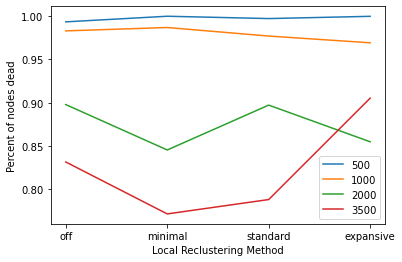

In [7]:
stats = compareLocalClusteringAndTotalNodes()
x = ['off', 'minimal', 'standard', 'expansive']
for nodeCount in data['var']['totalNodes']:
    y = []
    for i in data['var']['localRecluster']:
        y += [stats['%d-%d' % (nodeCount, i)]['Percent']]
    plt.plot(x, y, label='%d' % nodeCount)
plt.xlabel('Local Reclustering Method')
plt.ylabel('Percent of nodes dead')
plt.legend()
plt.show()

In [50]:
def compareBatteriesOverTime(keyInds):
    stats = {}
    counts = {}
    minArrLen = 10000000
    for key in data['data'].keys():
        for run in data['data'][key]:
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run['Percent Alive Over Time']
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    return stats, minArrLen

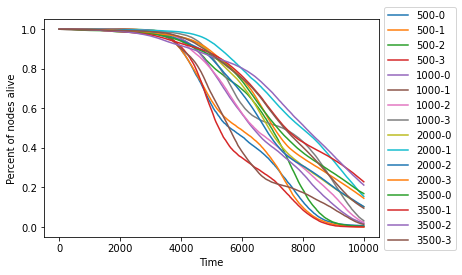

In [52]:
batteriesOverTime, minArrLen = compareBatteriesOverTime([0,3])
x = [i for i in range(minArrLen)]
for nodeCount in data['var']['totalNodes']:
    for i in data['var']['localRecluster']:
        key = '%d-%d' % (nodeCount, i)
        if key in batteriesOverTime.keys():
            y = batteriesOverTime[key]
            plt.plot(x, y, label=key)
plt.xlabel('Time')
plt.ylabel('Percent of nodes alive')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
def compareBatteriesOverTime():
    stats = {}
    counts = {}
    for key in data['data'].keys():
        for run in data['data'][key]:
            statsKey = '%d-%d' % (key[0], key[3])
            if statsKey in stats.keys():
                arr = run['Percent Alive Over Time']
                for i in range(len(arr)):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                arr = run['Percent Alive Over Time']
                stats[statsKey] = []
                for i in range(len(arr)):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
    for key in stats.keys():
        stats[key][i] = stats[key][i]/counts[key]
    return stats